# PC Games in eSports - Data Analysis

### Data Sournce: https://www.esportsearnings.com/

#### Import dataset for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
esports = pd.read_csv(r'GeneralEsportData.csv', encoding= "ISO-8859-1")

In [3]:
esports.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,190262.81,156839.89,255,96
1,Age of Empires II,1999,Strategy,1949008.74,619582.87,1357,989
2,Age of Empires III,2005,Strategy,68613.85,41500.00,108,77
3,Age of Empires Online,2011,Strategy,4078.56,0.00,19,12
4,Age of Mythology,2002,Strategy,52360.00,52000.00,22,6


### What are the top10 earning games?

In [4]:
top10_earning = esports.sort_values(by = 'TotalEarnings', ascending=False).head(10)
top10_earning

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
164,Dota 2,2013,Multiplayer Online Battle Arena,2.347956e+08,2.149289e+08,4059,1526
86,Counter-Strike: Global Offensive,2012,First-Person Shooter,1.171257e+08,7.607719e+07,13915,5760
515,Fortnite,2017,Battle Royale,1.064814e+08,4.220454e+07,4834,734
169,League of Legends,2009,Multiplayer Online Battle Arena,8.418914e+07,7.528469e+07,7801,2606
34,StarCraft II,2010,Strategy,3.520963e+07,2.922487e+07,2098,6081
519,PLAYERUNKNOWNS BATTLEGROUNDS,2017,Battle Royale,3.357292e+07,2.709537e+07,2995,334
119,Overwatch,2016,First-Person Shooter,2.722532e+07,1.822746e+07,3533,750
158,Arena of Valor,2015,Multiplayer Online Battle Arena,2.656149e+07,2.487718e+07,708,63
485,Hearthstone,2014,Collectible Card Game,2.524415e+07,1.848218e+07,2530,929
167,Heroes of the Storm,2015,Multiplayer Online Battle Arena,1.819348e+07,1.419642e+07,1256,476


### Visualize the top 10 earning games

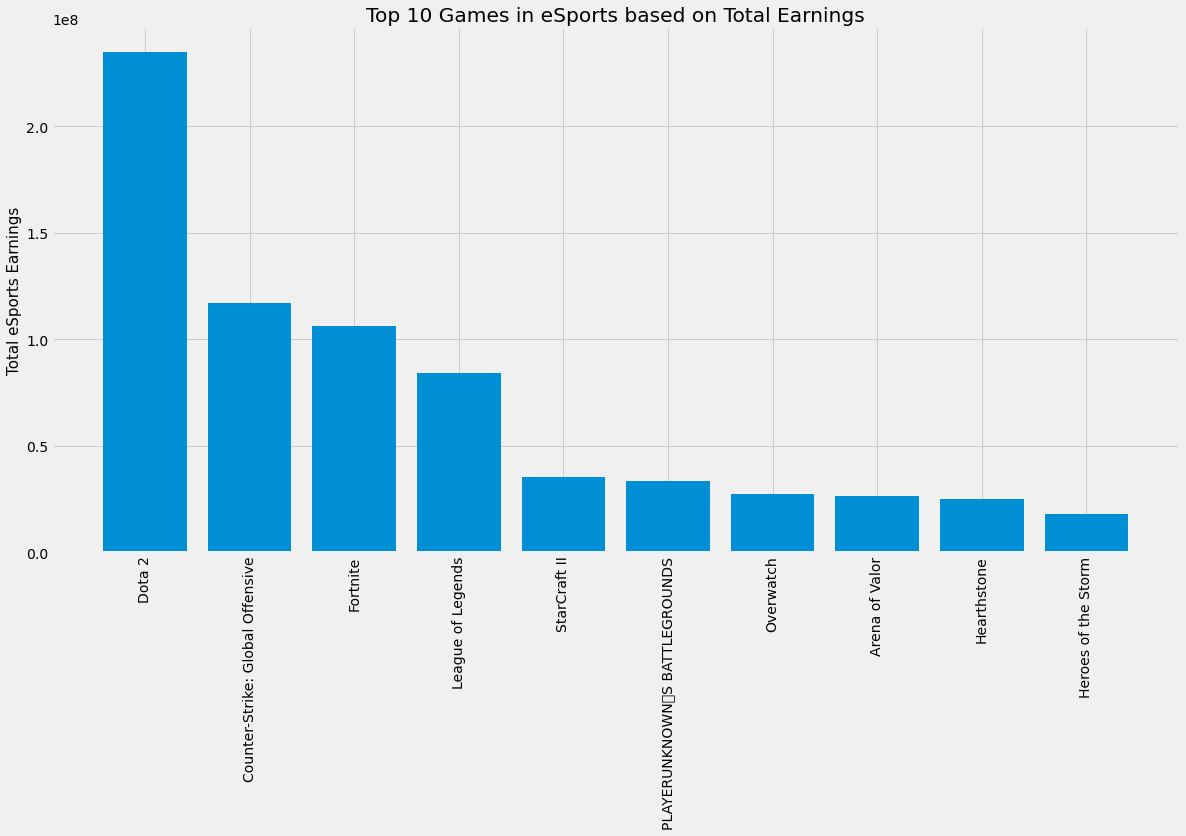

In [5]:
plt.figure(figsize = (18,9))
plt.bar(x = top10_earning['Game'], height = top10_earning['TotalEarnings'])
plt.title('Top 10 Games in eSports based on Total Earnings')
plt.ylabel('Total eSports Earnings', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

### Create a game economy variable (game economy)

In [6]:
esports['game_economy'] = esports['TotalEarnings']/esports['TotalPlayers']
esports.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,game_economy
0,Age of Empires,1997,Strategy,190262.81,156839.89,255,96,746.128667
1,Age of Empires II,1999,Strategy,1949008.74,619582.87,1357,989,1436.262889
2,Age of Empires III,2005,Strategy,68613.85,41500.00,108,77,635.313426
3,Age of Empires Online,2011,Strategy,4078.56,0.00,19,12,214.661053
4,Age of Mythology,2002,Strategy,52360.00,52000.00,22,6,2380.000000


### What are the top game economies based on eSports earnings?

In [7]:
# Remove zero values
esports = esports.loc[esports['TotalPlayers'] != 0]
esports = esports.loc[esports['TotalEarnings'] != 0]

In [8]:
# We're only interetsed in games that have more than 200 official esports players
esports = esports.loc[esports['TotalPlayers'] >= 200 ]

In [9]:
top10_economies = esports.sort_values(by = 'game_economy', ascending=False).head(10)
top10_economies

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,game_economy
164,Dota 2,2013,Multiplayer Online Battle Arena,2.347956e+08,2.149289e+08,4059,1526,57845.664245
158,Arena of Valor,2015,Multiplayer Online Battle Arena,2.656149e+07,2.487718e+07,708,63,37516.222881
111,Halo 5: Guardians,2015,First-Person Shooter,7.071481e+06,6.782681e+06,233,75,30349.703734
489,Magic: The Gathering Arena,2018,Collectible Card Game,6.012000e+06,5.354000e+06,241,38,24946.058091
515,Fortnite,2017,Battle Royale,1.064814e+08,4.220454e+07,4834,734,22027.600155
77,Call of Duty: Modern Warfare,2019,First-Person Shooter,7.500784e+06,6.785625e+05,382,81,19635.561518
70,Call of Duty: Black Ops 4,2018,First-Person Shooter,6.731939e+06,6.636162e+06,379,68,17762.371900
177,SMITE,2014,Multiplayer Online Battle Arena,9.250113e+06,7.872833e+06,545,97,16972.683945
81,Call of Duty: World War II,2017,First-Person Shooter,4.560271e+06,4.498605e+06,270,65,16889.892593
34,StarCraft II,2010,Strategy,3.520963e+07,2.922487e+07,2098,6081,16782.473680


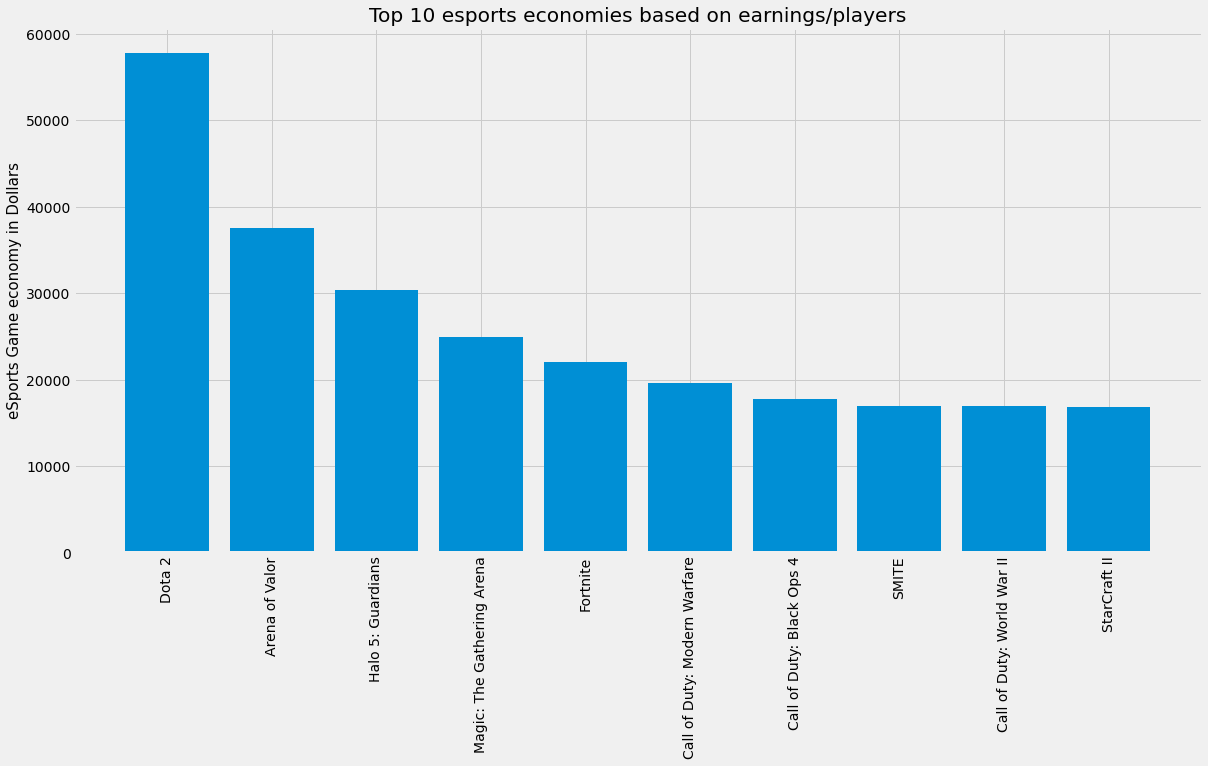

In [10]:
plt.figure(figsize=(18,9))
plt.bar(x = top10_economies['Game'], height = top10_economies['game_economy'])
plt.title('Top 10 esports economies based on earnings/players')
plt.ylabel('eSports Game economy in Dollars', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

### What are the top 20 games based on number of players?

In [11]:
top10_playercount = esports.sort_values(by = 'TotalPlayers', ascending=False).head(20)
top10_playercount

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,game_economy
86,Counter-Strike: Global Offensive,2012,First-Person Shooter,1.171257e+08,7.607719e+07,13915,5760,8417.228819
169,League of Legends,2009,Multiplayer Online Battle Arena,8.418914e+07,7.528469e+07,7801,2606,10792.096506
515,Fortnite,2017,Battle Royale,1.064814e+08,4.220454e+07,4834,734,22027.600155
83,Counter-Strike,2000,First-Person Shooter,1.355396e+07,1.284073e+07,4225,1017,3208.036795
164,Dota 2,2013,Multiplayer Online Battle Arena,2.347956e+08,2.149289e+08,4059,1526,57845.664245
119,Overwatch,2016,First-Person Shooter,2.722532e+07,1.822746e+07,3533,750,7706.005457
519,PLAYERUNKNOWNS BATTLEGROUNDS,2017,Battle Royale,3.357292e+07,2.709537e+07,2995,334,11209.656735
152,VALORANT,2020,First-Person Shooter,4.982645e+06,8.693800e+05,2580,392,1931.257829
485,Hearthstone,2014,Collectible Card Game,2.524415e+07,1.848218e+07,2530,929,9977.926273
325,Super Smash Bros. Ultimate,2018,Fighting Game,1.544684e+06,1.246011e+06,2124,1465,727.252571


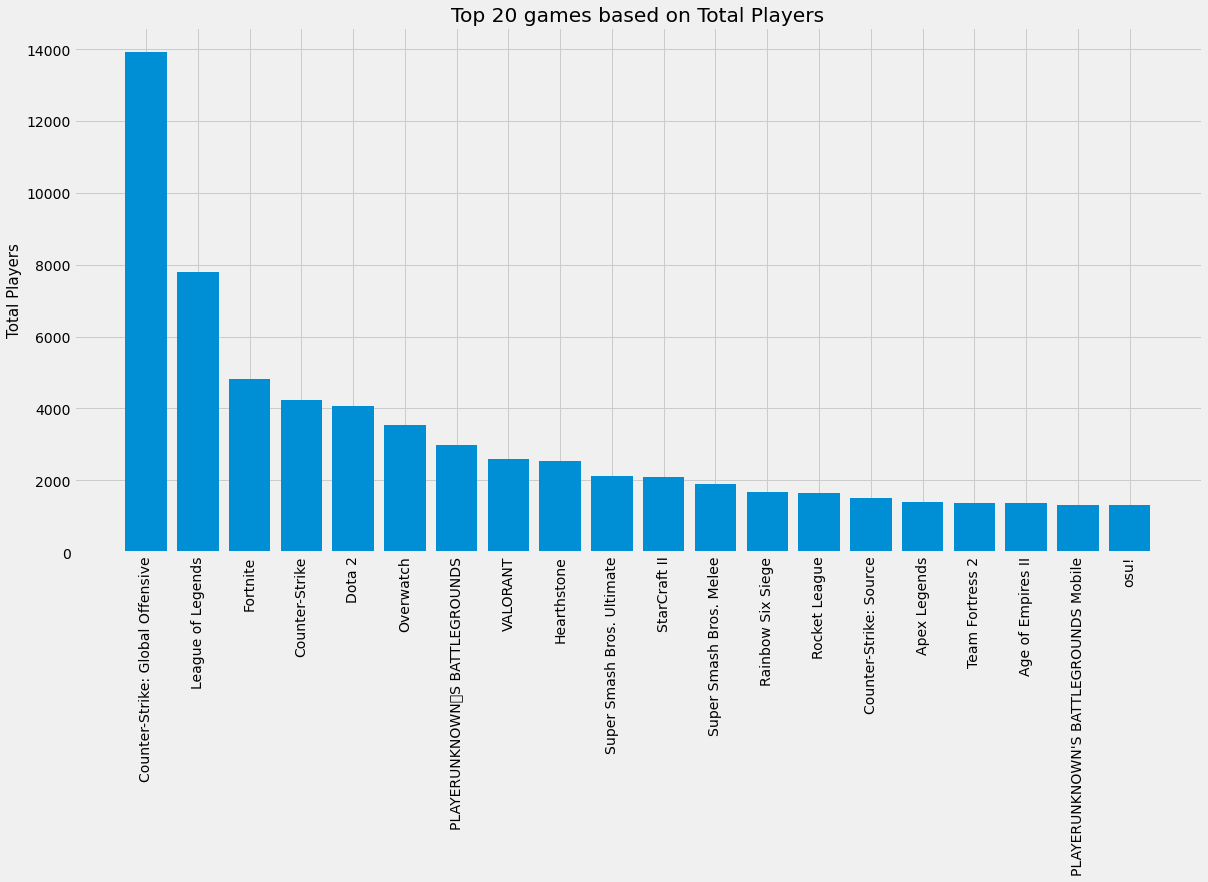

In [12]:
plt.figure(figsize = (18,9))
plt.bar(x = top10_playercount['Game'], height = top10_playercount['TotalPlayers'])
plt.title('Top 20 games based on Total Players')
plt.ylabel('Total Players', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

### What are the top Genres of esports?

In [13]:
top_genre = esports.groupby('Genre').agg({'TotalEarnings': 'sum'})
top_genre = top_genre.sort_values(by = 'TotalEarnings', ascending = False)
top_genre.head()

,TotalEarnings
Genre,
Multiplayer Online Battle Arena,3.778623e+08
First-Person Shooter,2.475763e+08
Battle Royale,1.660390e+08
Strategy,6.286392e+07
Collectible Card Game,3.559153e+07


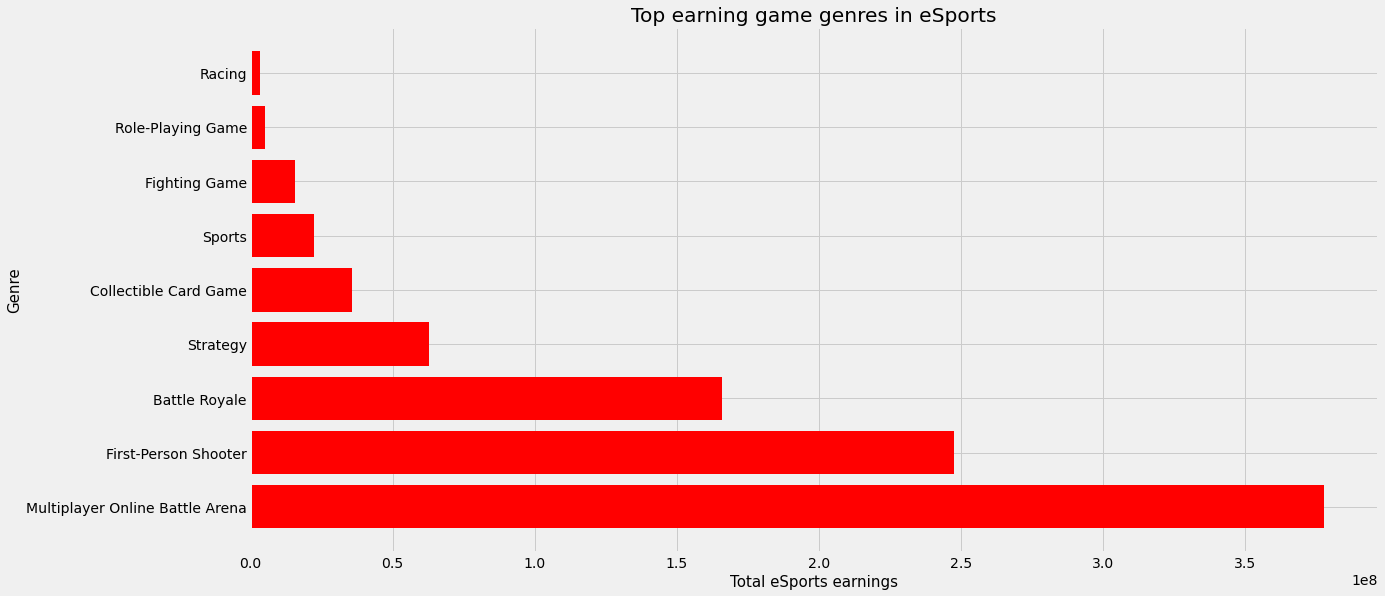

In [14]:
plt.figure(figsize=(18,9))
plt.barh(y = top_genre.index, width = top_genre.TotalEarnings, color = 'red')
plt.title('Top earning game genres in eSports')
plt.xlabel('Total eSports earnings', fontsize = 15)
plt.ylabel('Genre', fontsize = 15)
plt.show()